In [1]:
# this program will do PCA on 169k song data that has 13 dimensions and compress it to 3 dimension
# weight of each of the 13 feature will be plotted 

# referenced Mark's code on hw1 especially on "wine dataset"

import matplotlib.pyplot as plt # For general plotting
from matplotlib import cm

import numpy as np
from scipy.stats import multivariate_normal # MVN not univariate

import pandas

#import model

from collections import defaultdict

from sklearn import preprocessing

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(7)

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title

In [2]:
# read in 169k song data from data file 

file_path = "data.csv"
songdata = pandas.read_csv(file_path, index_col='year')

# drop unused columns 
songdata.drop(['artists','id', 'name', 'release_date', 'popularity'], axis = 1, inplace = True)

songdata.shape

(169909, 13)

In [3]:
# check to see if data was stored in correctly

print(songdata.head(3))

songdata.shape

songdata.columns

# see what data type Pandas interprets each column as 
songdata.dtypes


      acousticness  danceability  duration_ms  energy  explicit  \
year                                                              
1928         0.995         0.708       158648  0.1950         0   
1928         0.994         0.379       282133  0.0135         0   
1928         0.604         0.749       104300  0.2200         0   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
year                                                                          
1928             0.563   10    0.1510   -12.428     1       0.0506  118.469   
1928             0.901    8    0.0763   -28.454     1       0.0462   83.972   
1928             0.000    5    0.1190   -19.924     0       0.9290  107.177   

      valence  
year           
1928   0.7790  
1928   0.0767  
1928   0.8800  


acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [4]:
# drop years to normalize data

l_drop = np.arange(1921,1950)
l_drop = np.concatenate((l_drop,[2020]))
songdata.drop(labels=l_drop, axis=0, inplace = True)

In [5]:
# regularize data 

covariance = songdata.std()
mean = songdata.mean()
X = (songdata-songdata.mean())/songdata.std()

In [6]:
# perfrom PCA 

pca = PCA(n_components=3)  # n_components is how many PCs we'll keep
X_fit = pca.fit(X)  # Is a fitted estimator, not actual data to project
Z = pca.transform(X)

# Illustrates that we have at least 90% of the total variance captured by the PCA
print("Explained variance ratio: ", pca.explained_variance_ratio_)

#print(pandas.DataFrame(pca.components_, columns=songdata.columns, index = ['PC-1','PC-2','PC-3']))

x = pandas.DataFrame(pca.components_, columns=songdata.columns, index = ['PC-1','PC-2','PC-3'])

# store each pca layer for bar graph
# store values in x row by row
pca0 = x.iloc[0]
pca1 = x.iloc[1]
pca2 = x.iloc[2]

pca = []

pca.append(pca0)
pca.append(pca1)
pca.append(pca2)
#print(pca)

Explained variance ratio:  [0.2426016  0.10814065 0.10782949]


In [10]:
# make bar graph for each pca layer 

def plotPCA(pcas):

    plt.figure(figsize=(20,20))
    plt.barh(x.columns, abs(pcas), color="orange")
    #plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("weight")
    plt.title("Weight Distibutionn per Feature in PCA")
    
    #show values on bar graph
    for index, value in enumerate(pcas):
        plt.text(abs(value), index, str(round(abs(value), 3)))
        #plt.text(index, abs(value), str(round(abs(value), 3)))
    
    plt.show()
    #print("{}:\n{}".format(variable,var_value))

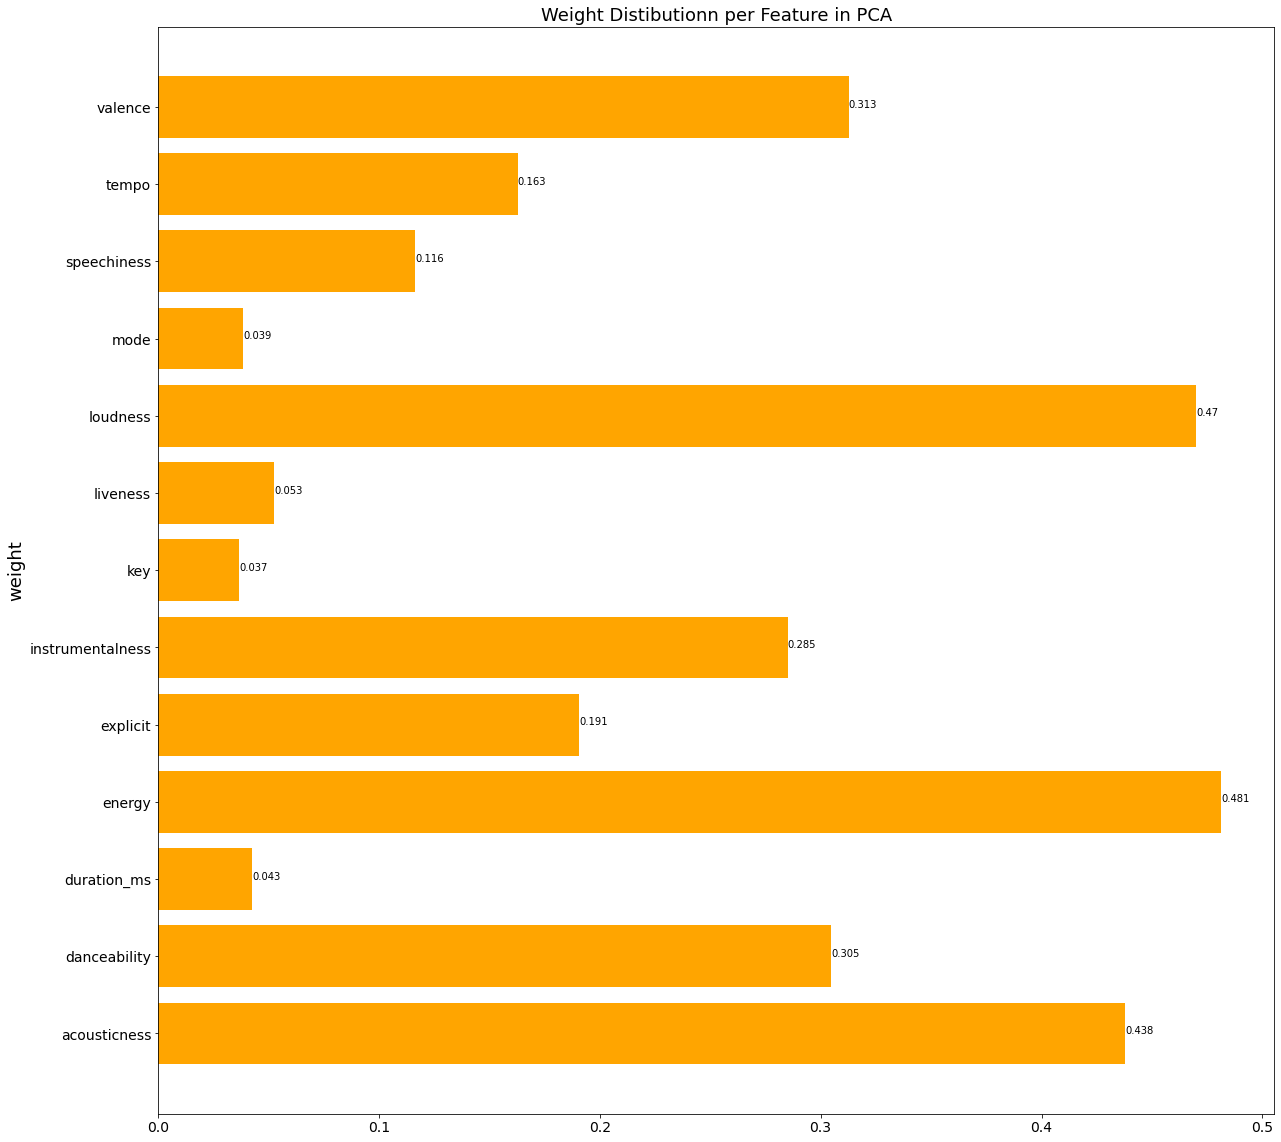

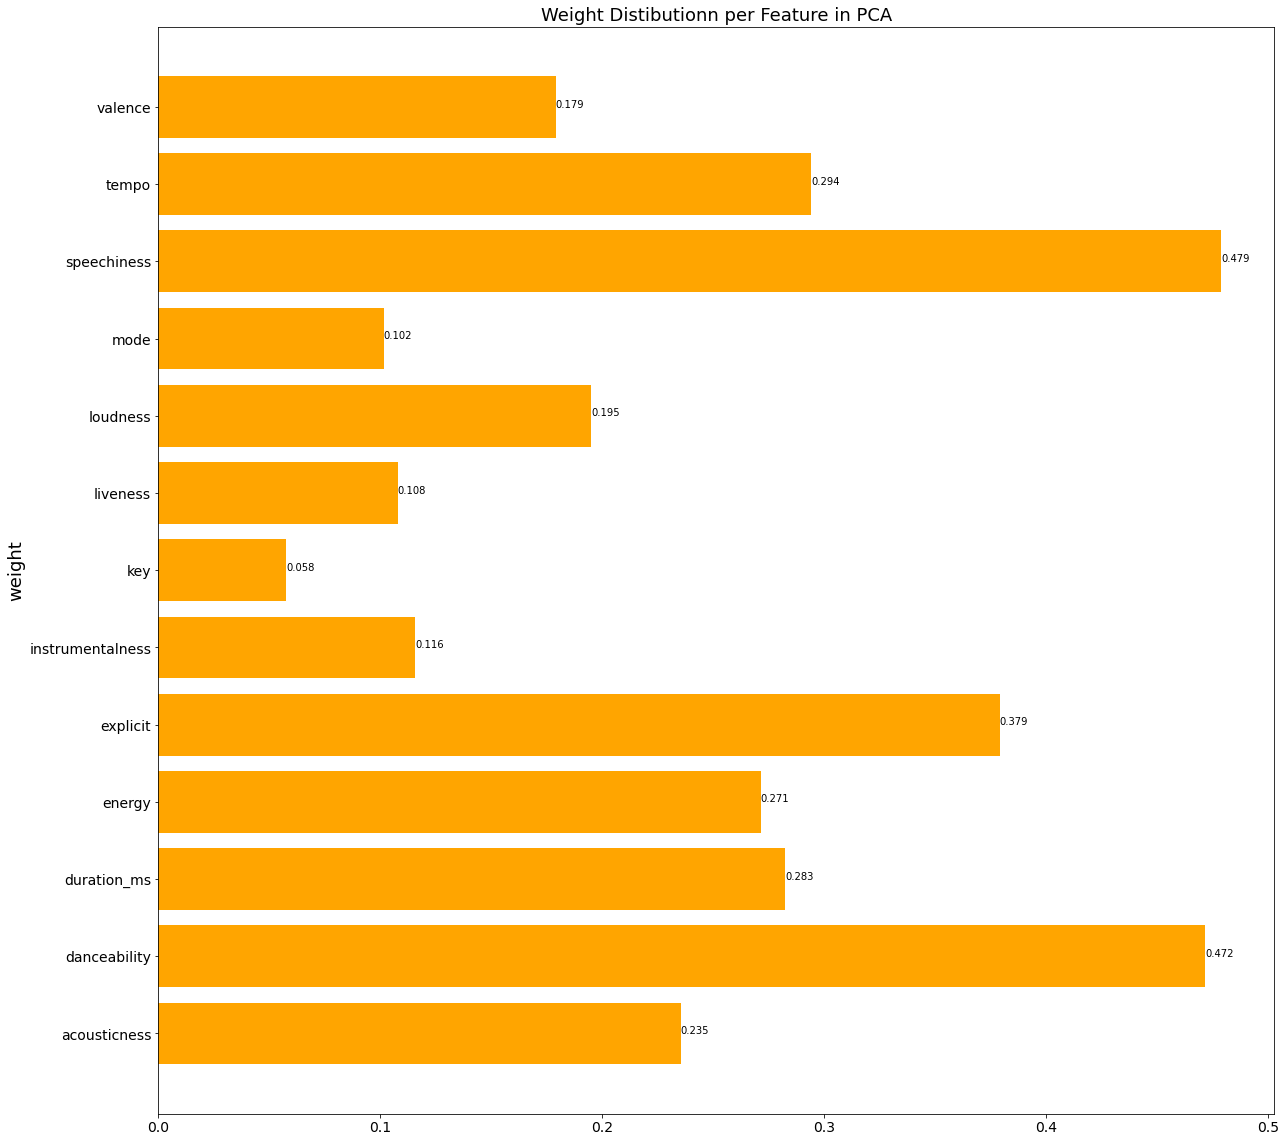

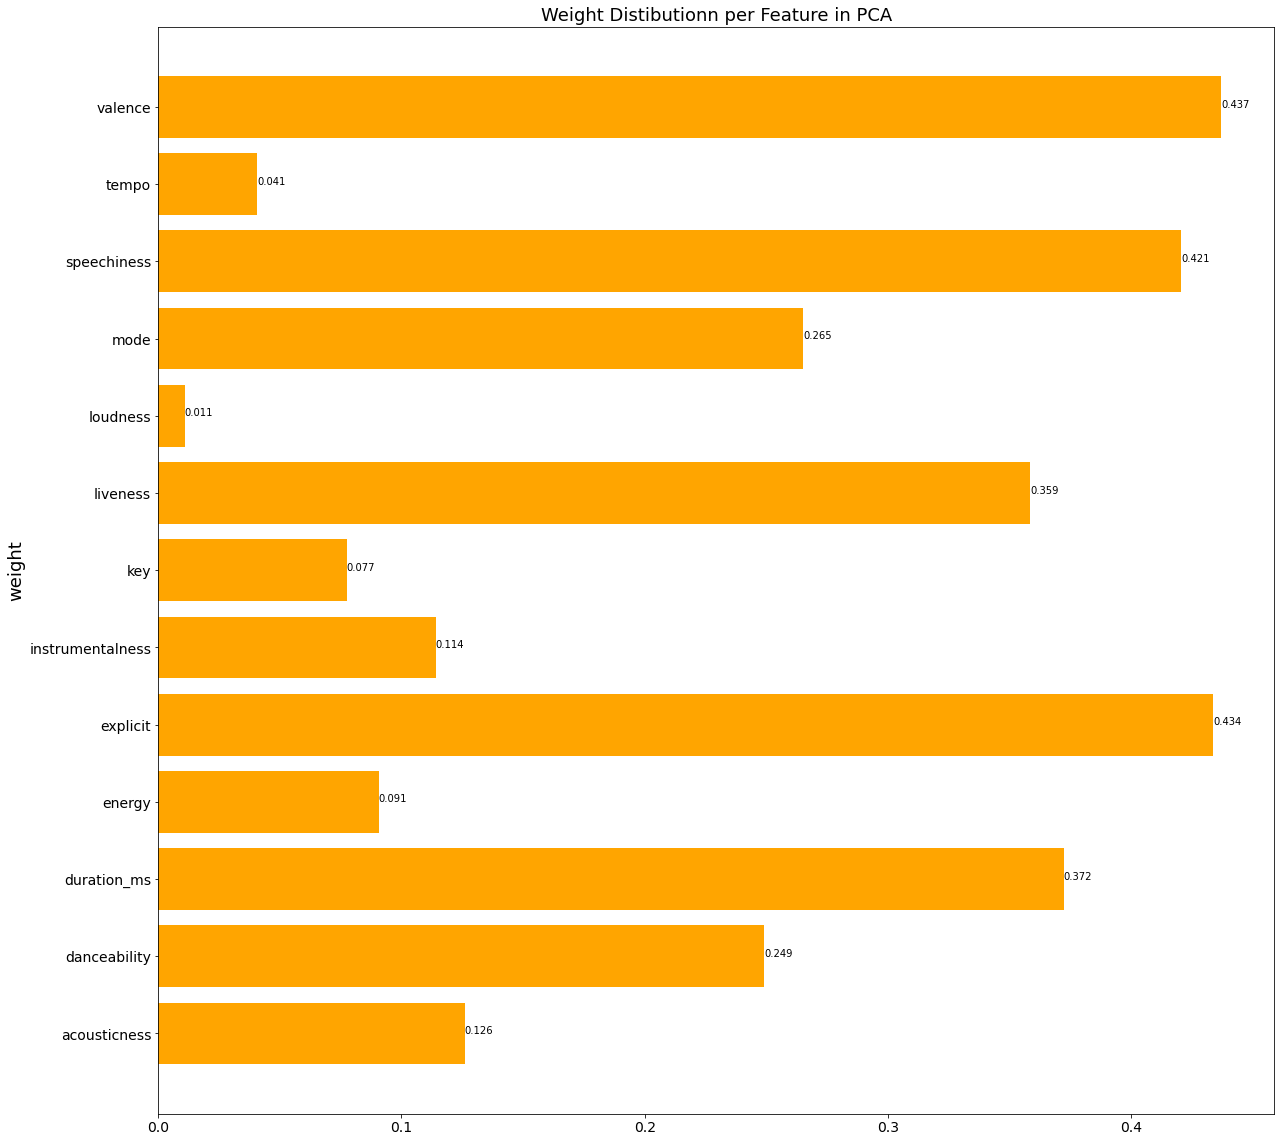

In [11]:
# call function to plot PCA weight graphs

for i in pca:
    plotPCA(i)

In [17]:
# create some labels for each song data

enc = LabelEncoder()

labels = songdata.index

enc.fit(songdata.index.unique())

y = enc.transform(np.array(labels))
print(np.unique(y))

# transform index from year to decade 
# 5 = 1950; 6 = 1960; 7 = 1970; etc.
y_decade = (y//10)*10 + 1950

Y_decade = np.unique(y_decade)
#print(np.unique(Y_decade))
print(y_decade)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
[1950 1950 1950 ... 2010 2010 2010]


In [24]:
# function to plot PCA 3d graph 

def plot_representations(data, labels, n_images=None):

    if n_images is not None:

        data = data[:n_images]

        labels = labels[:n_images]

    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='tab10')
    
    handles, labels = scatter.legend_elements()

    leg = ax.legend(handles=handles, labels=labels)
    
    leg.set_title('Decades',prop={'size':18})
    
    ax.set_xlabel(r"$z1$")
    ax.set_ylabel(r"$z2$")
    ax.set_zlabel(r"$z3$")

    plt.title("PCA of Song Dataset")


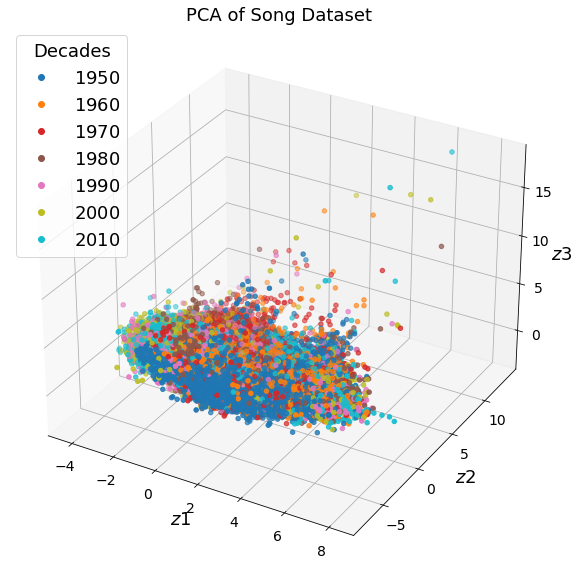

In [25]:
# plot song data after PCA 

plot_representations(Z, y_decade)
